<a href="https://colab.research.google.com/github/Nuelky/Finance/blob/main/ML_GWP2_8530_MScFE632_Machine_Learning_in_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##STEP 2:

**TEAM MEMBER A: CATEGORY 6 (Support Vector Machine, SVM)**

---



● Basics:
Support Vector Machine (SVM) is a supervised machine learning technique both powerful and versatile because although primarily a classification technique; it can be used for both classification and regression while also allowing the use of various kernels for non-linearly separable data and parameter tuning (C and kernel parameters) to suit the needs of the problem at hand. They are applicable to wide financial problems ranging from time series forecasting to chaotic systems. The basic idea is to map data to a higher dimensional space and use a maximum-margin hyperplane to separate the data.

● Advantages:
SVM are effective in handling high dimensional data with large number of features effectively and in a memory efficient manner.
The Memory efficiency stems from only need to store the support vectors after training.
SVMs are versatile and can be adapted for both linear and nonlinear data classification. While fundamentally a classification technique,  it can be used for regression and prediction tasks.  
SVMs are robust to overfitting aiming to maximize the margin helps the generalization and reducing risk for overfitting especially in high-dimensional spaces.

● Disadvantages:
The effectiveness is greatly reduced on noisier data  with overlapping classes.
Parameter Tuning: SVMs have several hyperparameters (like C, kernel type, kernel parameters) that makes it versatile but need careful tuning to achieve optimal performance.
Computational Cost: Although memory efficient after training and uses kernels for computational efficiency, Training can be computationally expensive, especially with large datasets.
Interpretability: SVMs can be difficult to interpret, especially when using non-linear kernels, making it hard to understand the factors driving predictions. SVMs also do not provide target class probabilities directly but Platt scaling and isotonic regression may be used for this.

● Equations:
Linear Classifier:
f(x) = wTx + b where 'w' is the weight vector, 'x' is the input vector, and 'b' is the bias.
Optimization Problem (Hard Margin):
Minimize ||w||2 subject to yi(wTxi + b) ≥ 1 for all training examples (xi,yi).
Optimization Problem (Soft Margin):
Minimize ||w||2 + C Σ ξi subject to yi(wTxi + b) ≥ 1 - ξi for all training examples. C is the regularization parameter, and ξi are slack variables that allow for misclassifications. See figure below from Okasha MK et al. 2013.

From: Okasha, Mahmoud K. Using Support Vector Machines in Financial Time Series Forecasting. 2013.

● Features:
Kernel Trick: A core characteristic allows SVMs to operate in high-dimensional spaces and perform non-linear classification efficiently.
Margin Maximization: SVMs are designed to find the decision boundary with the largest possible margin.
Support Vectors: The decision function is defined by a subset of training samples called support vectors. (see figure below from lect2 posted in forum by instructor)
Other functional features include : Effectiveness in high dimensional spaces, memory efficiency, versatility, and robustness to overfitting.


● Guide:
Inputs:
Training data: A set of data points (xi) with corresponding class labels (yi). xi are feature vectors, and yi are typically {-1, 1} for binary classification.
Hyperparameters: These control the behavior of the SVM (e.g., C, kernel type, kernel parameters).
Outputs:
A trained SVM model: This consists primarily of the weight vector (w) and bias (b) (or support vectors and alpha values in some formulations).
Prediction: For a new input 'x', the model outputs a class label (+1 or -1) based on the sign of the decision function (wTx + b).
Note high versatility of methods allows adaptation to include regression and classification problems on linearly and nonlinearly separable data with suitable inputs and outputs.

● Hyperparameters:
C (Regularization parameter): Controls the trade-off between achieving a low training error and a large margin. Small C allows misclassifications, large C penalizes them heavily.
Kernel Type: Specifies the kernel function to be used (e.g., linear, polynomial, radial basis function (RBF)).
Kernel Parameters: Parameters specific to the chosen kernel (e.g., degree for polynomial kernel, gamma for RBF kernel).

●  Computation and Illustration: (see next section below)



Source: Quan, Z., Pu, L. An improved accurate classification method for online education resources based on support vector machine (SVM): Algorithm and experiment. Educ Inf Technol 28, 8097–8111 (2023). https://doi.org/10.1007/s10639-022-11514-6
Basic Idea: SVMs find a hyperplane that separates data points of different classes with the largest possible margin.
Linear SVM: In 2D, this hyperplane is a line. The goal is to find the "best" line that maximizes the distance to the nearest data points of each class.
Support Vectors: The data points closest to the decision boundary are called support vectors. They are crucial for defining the SVM.
Non-linear SVM: Kernel functions are used to implicitly map the data into a higher-dimensional space where a linear separation is possible. Common kernels include polynomial and RBF.

● Journal:

Tay, Francis E.H, and Lijuan Cao. “Application of support vector machines in financial time series forecasting.” Omega, vol. 29, no. 4, Aug. 2001, pp. 309–317, https://doi.org/10.1016/s0305-0483(01)00026-3.

Tian L. Design and Implementation of Financial Service and Management Platform considering Support Vector Machine Algorithm. Comput Intell Neurosci. 2022 Sep 9;2022:7964123. doi: 10.1155/2022/7964123. PMID: 36120675; PMCID: PMC9481309.


● Keywords:
Support Vector Machine (SVM); Kernels, hyperplane, support vectors, Maximal Margin Classifier, Supervised Learning, Machine Learning; Financial Time Series ;Stock Market;


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Instead of plot_confusion_matrix, import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from mlxtend.plotting import plot_decision_regions

#from sklearn.metrics import plot_confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions

# Configuration options
num_samples_total = 2500
cluster_centers = [(5,5), (3,3), (1,5)]
num_classes = len(cluster_centers)

In [ ]:
# Generate data : two features and two classes
X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=2500, mean=(2,3))
X,y

(array([[ 2.25191003,  2.40707787],
        [ 1.3566019 ,  2.04139125],
        [-1.17989164,  2.05479183],
        ...,
        [ 4.27454422,  2.1718539 ],
        [ 1.67556536,  2.80908748],
        [ 1.90082133,  3.69876774]]),
 array([0, 0, 1, ..., 1, 0, 0]))

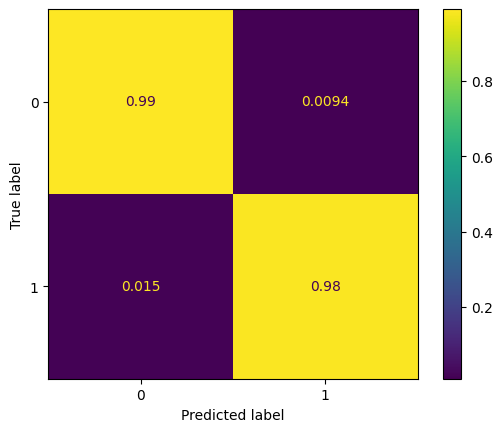

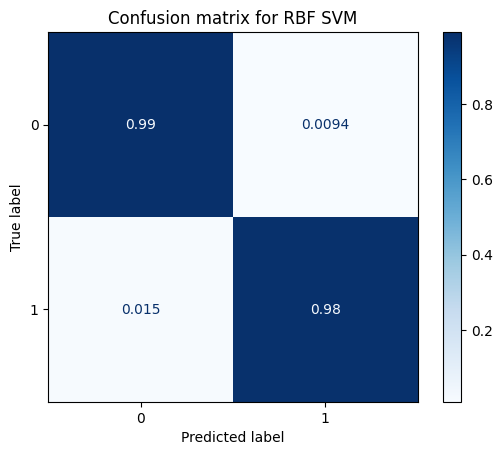

Model accuracy: 0.9878787878787879


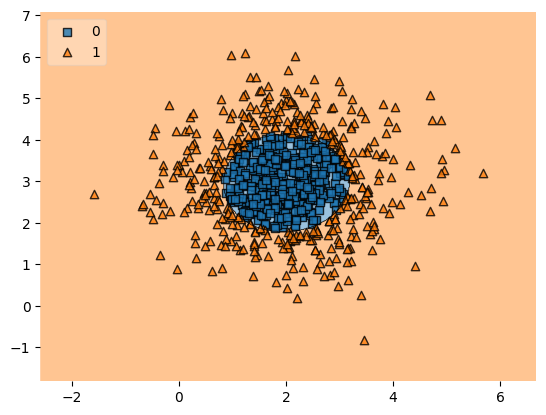

In [ ]:

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create the SVM
svm = SVC(random_state=42, kernel='rbf')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Evaluate performance with a confusion matrix
# Create the ConfusionMatrixDisplay object first
matrix = ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test,
                                 normalize='true')
# Then, plot the confusion matrix with the desired cmap
matrix.plot(cmap=plt.cm.Blues)  # Pass cmap to the plot method

plt.title('Confusion matrix for RBF SVM')
plt.show()

# Generate predictions
y_pred = svm.predict(X_test)

# Evaluate performance with accuracy metric
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

# Plot decision boundary
plot_decision_regions(X_test, y_test, clf=svm, legend=2)
plt.show()

code illustration adapted from : https://github.com/christianversloot/machine-learning-articles/blob/main/using-radial-basis-functions-for-svms-with-python-and-scikit-learn.md



**Team member B: Category C (Neural Networks)**

**ADVANTAGES**

Neural networks provide advantages in addressing complex problems, especially those involving large datasets and intricate, non-linear patterns. Key benefits are:

- They are highly effective at modeling non-linear relationships, outperforming many traditional machine learning methods. This makes them ideal for tasks such as image and speech recognition, anomaly detection, and time-series forecasting.

- Neural networks are also remarkably adaptable. Once trained, they can generalize from observed patterns and make accurate predictions on new, unseen data, adjusting to evolving inputs.

- Another major strength is their capacity to handle high-dimensional data. Unlike linear models that struggle with large feature spaces, neural networks process numerous inputs simultaneously and extract meaningful patterns.

These models support parallel computations, enabling them to efficiently scale to massive datasets and perform difficult operations quickly.

Also, they show resilience to noisy or incomplete data thereby maintaining reliable predictive performance even when some inputs are missing or corrupted.

When properly structured and tuned, neural networks can continuously learn from new data, refining their accuracy and adapting to changing environments.



**COMPUTATION**

Neural networks operate through a series of mathematical computations that enable them to learn patterns from data and make informed predictions. Below is an outline of this process:

Each neuron in the network takes inputs from either the data or the previous layer—multiplied by their associated weights. These are then summed with a bias term:
$$
z = \sum_{i=1}^{n} w_i x_i + b
$$

This weighted sum is passed through an activation function, which introduces  non-linearity which is essential in capturing relationships. Common activation functions include ReLU, sigmoid, and tanh. The process continues through each layer, with the output of one becoming the input for the next—this is forward propagation.

A loss function is then used to measure the discrepancy between the model’s output and the actual target values. For instance, mean squared error is often used in regression tasks, while cross-entropy is typical in classification problems.

To illustrate this, we created a simple mock dataset for a binary classification task. We generated 100 samples with two features each, labeled based on a linear rule (sum > 0). A basic neural network was built with one hidden layer (4 nodes) and an output layer (1 node). The tanh activation function was applied to the hidden layer, and a sigmoid function to the output. The network's predictions values are between 0 and 1 which shows the confidence in classifying each data point.

A scatter plot with red and blue points denoting the two classes, visually shows the decision boundary learned by the network.


**DISADVANTAGES**

Despite their strengths, neural networks have some disadvantages:

(i) They usually require large amounts of labeled data to perform effectively. Without sufficient data, they may struggle to generalize.

(ii) Training neural networks, for e.g., deep architectures, demands huge computational power—often relying on GPUs or TPUs, which can be costly and energy-intensive.

(iii) They are prone to overfitting, especially in the absence of sufficient data or proper regularization, resulting in poor generalization to new data.

(iv) Neural networks often lack interpretability. Their internal processes can be opaque. this makes it difficult to understand or justify their decisions, an issue in high-stakes applications.

(v) Training can be time-consuming. Depending on model complexity and dataset size, training may span from hours to weeks, which limits rapid iteration.

**FEATURES**

Neural networks have several defining features which contribute to their power:

Their architecture consists of an input layer, multiple hidden layers, and an output layer, this allows hierarchical learning of patterns from data. Each layer contains neurons—computational units inspired by biological neurons—that process and relay information.

They are known as universal function approximators, meaning they can model any continuous function given adequate capacity and data. Optimization algorithms like gradient descent are used to minimize the loss function by adjusting the weights and biases.

To improve generalization and prevent overfitting, techniques such as dropout, L1/L2 regularization, and early stopping are frequently used.


**EQUATIONS**

Below are mathematical formulas that are very important in neural network operations:


**(i) Weighted Summation**  
$$
z = \sum_{i=1}^{n} w_i x_i + b
$$

**(ii) Activation Functions**  
Sigmoid:  
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$  
ReLU (Rectified Linear Unit):  
$$
\text{ReLU}(z) = \max(0, z)
$$  
Hyperbolic Tangent:  
$$
\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$$

**(iii) Forward Propagation**  
$$
a^{(l+1)} = f(W^{(l)} a^{(l)} + b^{(l)})
$$

**(iv) Loss Functions**  
Mean Squared Error (MSE):  
$$
\mathcal{L} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$  
Cross-Entropy:  
$$
\mathcal{L} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

**(v) Backpropagation Gradient**  
$$
\frac{\partial \mathcal{L}}{\partial w} = \frac{\partial \mathcal{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w}
$$

**(vi) Gradient Descent**  
$$
w = w - \eta \frac{\partial \mathcal{L}}{\partial w}
$$

**(vii) L2 Regularization**  
$$
\mathcal{L}_{\text{reg}} = \mathcal{L} + \frac{\lambda}{2m} \sum w_i^2
$$

**(viii) Weight Initialization**  
Xavier or He initialization methods are used dependeding on the activation functions and layer sizes.

**(ix) Mini-Batch Update Rule**  
$$
w = w - \frac{\eta}{n_b} \sum_{i=1}^{n_b} \frac{\partial \mathcal{L}^{(i)}}{\partial w}
$$

**(x) Learning Rate Scheduling**  
The learning rate η can be adjusted over time using methods like exponential decay or step-based decay.



**GUIDE**
Designing and training neural networks requires adherence to these best practices:

- Understand the problem and data: Clearly define the problem and ensure the dataset is well-prepared (e.g., normalized, cleaned).

- Architecture selection: Choose model types suitable for the task (e.g., CNNs for images, RNNs for sequences). Start simple and scale up.

- Data partitioning: Divide data into training, validation, and test sets to ensure reliable model evaluation and tuning.

- Feature scaling: Normalize inputs to accelerate convergence and stabilize training.

- Weight initialization: Use strategies like Xavier or He to prevent training issues like vanishing gradients.

- Activation functions: Choose based on task characteristics, being cautious of pitfalls like the dying ReLU problem.

- Batch size and learning rate: Tune carefully, possibly using adaptive methods like Adam or RMSprop.

- Regularization: Prevent overfitting through dropout, L1/L2 penalties, and early stopping.

- Hyperparameter optimization: Use grid search or random search to systematically explore parameter combinations.

- Evaluation metrics: Choose performance metrics suited to the task—accuracy, F1, AUC, etc.

- Transfer learning: When data is limited, fine-tune pre-trained models instead of training from scratch.

- Ethical considerations: Ensure fairness, transparency, and accountability throughout model development and deployment.


**HYPERPARAMETERS**

Neural networks are complex computational architectures that rely on a set of predefined values known as hyperparameters to guide their learning process. Unlike parameters learned during training, hyperparameters are specified before training begins and shape the model’s structure and behavior. Core hyperparameters include the number of layers and neurons, which determine the network’s depth and width, affecting its capacity to uncover intricate patterns in the data. The learning rate, a central hyperparameter, dictates how quickly the model updates its internal weights. If set too high, it can cause instability or overshooting; if too low, it may slow down convergence significantly.

Activation functions—such as ReLU, sigmoid, or tanh—enable the network to learn non-linear relationships, while batch size and epoch count influence memory efficiency, convergence dynamics, and the potential for overfitting. The choice of optimizer (e.g., SGD, Adam, RMSprop) and loss function (like mean squared error or cross-entropy) depends on the learning objective. Techniques such as weight initialization and regularization methods—including L1/L2 penalties and dropout—are used to improve generalization and avoid overfitting.

Tuning hyperparameters is a very imoortant and often empirical process that balances a network's learning ability with its capacity to generalize to unseen data. Strategies like learning rate scheduling—where the rate is adjusted during training and early stopping where training halts when performance on a validation set starts to degrade can greaty improve training outcomes. The network's architecture (e.g., CNNs for spatial data or RNNs for sequential inputs) is selected based on the task's domain and complexity. Ultimately, effective hyperparameter selection plays a pertinent role in shaping the performance and robustness of neural networks.


**JOURNAL**

Adam Fadlalla, Chien-Hua Lin, (2001) An Analysis of the Applications of Neural Networks in Finance. Interfaces 31(4):112-122.
https://doi.org/10.1287/inte.31.4.112.9662

Burrell, P. R., & Folarin, B. O. (1997). The impact of neural networks in finance. Neural Computing & Applications, 6, 193-200.

Refenes, A. P., Burgess, A. N., & Bentz, Y. (1997). Neural networks in financial engineering: A study in methodology. IEEE transactions on Neural networks, 8(6), 1222-1267.

*More on computation*

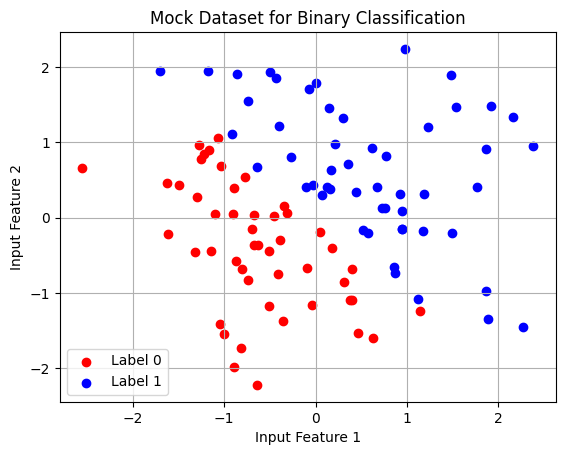

[0.50782272 0.18263067 0.70752066 0.62263532 0.3336706  0.20958698
 0.51692085 0.39317648 0.64541889 0.7421856 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate mock binary classification data
np.random.seed(0)
features = np.random.randn(100, 2)
labels = (features[:, 0] + features[:, 1] > 0).astype(int)  # Linear separation

# Plot the generated data
plt.scatter(features[labels == 0][:, 0], features[labels == 0][:, 1], c='red', label='Label 0')
plt.scatter(features[labels == 1][:, 0], features[labels == 1][:, 1], c='blue', label='Label 1')
plt.title('Mock Dataset for Binary Classification')
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Define activation and network routines
def sigmoid_fn(x):
    return 1 / (1 + np.exp(-x))

def setup_weights(n_input, n_hidden, n_output):
    w1 = np.random.randn(n_hidden, n_input)
    b1 = np.zeros((n_hidden, 1))
    w2 = np.random.randn(n_output, n_hidden)
    b2 = np.zeros((n_output, 1))
    return w1, b1, w2, b2

def run_forward_pass(data, w1, b1, w2, b2):
    z1 = np.dot(w1, data.T) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid_fn(z2)
    return a2

# Define network structure and initialize weights
n_input, n_hidden, n_output = 2, 4, 1
weights1, bias1, weights2, bias2 = setup_weights(n_input, n_hidden, n_output)

# Perform forward pass through the network
nn_output = run_forward_pass(features, weights1, bias1, weights2, bias2)

# View first 10 predictions
print(nn_output[0, :10])


### Team member C: Linear Discriminant Analysis (LDA)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

We choose breast cancer datasets here, as its features are all continuous numerical data, fitting the assumptions of LDA.

In [ ]:
from sklearn.datasets import load_breast_cancer
dat = load_breast_cancer()
cancer_dat = pd.DataFrame(columns=dat.feature_names, data=dat.data)
cancer_dat['target'] = dat.target
cancer_dat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Split and standardize data

In [ ]:
X = cancer_dat.iloc[:, :-1].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = cancer_dat.iloc[:, -1].values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Run model and show results

In [ ]:
lda = LinearDiscriminantAnalysis()
X_lda_train = lda.fit_transform(X_train, y_train)
X_lda_test = lda.transform(X_test)

preds = lda.predict(X_test)
confusion_matrix(y_test, preds)

array([[34,  3],
       [ 0, 77]])

Visualize results

<Axes: title={'center': 'X'}, xlabel='Y'>

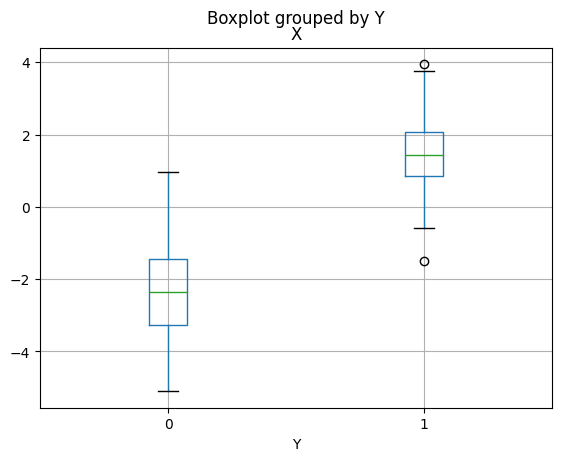

In [ ]:
temp = pd.DataFrame({'X': X_lda_train.flatten(), 'Y': y_train})
temp.boxplot('X', by = 'Y')

# **Step 4: Technical Section**

Linear Discriminant Analysis (LDA) is mostly used for both dimensionality reduction and classification. When compared to models like Support Vector Machines (SVMs) or neural networks, LDA involves fewer hyperparameters. However, several options still affect its behavior. It is important to note that LDA supports different solvers—such as 'svd', 'lsqr', and 'eigen' with each offering different trade-offs in computational performance and numerical stability. Also, the shrinkage parameter can be used to introduce regularization. This helps to mitigate overfitting and improve robustness in cases of small or ill-conditioned datasets.

For SVMs, while it is conceptually similar to LDA in separating classes, they tend to outperform LDA in many classification settings due to their ability to handle non-linear boundaries using the kernel trick. Key hyperparameters in SVMs include the kernel type, the regularization constant C, and the kernel coefficient gamma. The kernel determines the transformation of input data into higher dimensions and includes choices like linear, polynomial, radial basis function (RBF), and sigmoid. The C parameter manages the trade-off between maximizing the margin and minimizing classification errors. A high C can lead to a tighter fit and possible overfitting. Meanwhile, gamma controls how far the influence of a single training example reaches, with higher values leading to more flexible, yet potentially overfit, decision boundaries.

Neural networks offer extensive flexibility through a larger set of hyperparameters, making them powerful but more complex to tune. The architecture is defined by the number of layers and neurons, determines the network’s ability to capture hidden patterns. Activation functions such as ReLU, sigmoid, and tanh shape the way neurons process inputs. The learning rate, an important parameter, governs the speed of weight updates during training. If set too high, it may cause the model to diverge; if too low, convergence can be slow. Additional hyperparameters include batch size, number of epochs, and regularization methods such as dropout or L1/L2 penalties, all of which influence generalization and training dynamics.

# **Step 5: Marketing Alpha**

Having seen the predictive capabilities of machine learning across different domains, we now turn to its role in generating marketing alpha, that is, identifying strategies that can yield excess returns in business and financial world.

Linear Discriminant Analysis (LDA) is effective for both classification and dimensionality reduction tasks, especially when the target variable is categorical. It works by finding a linear combination of features that best separates classes. In marketing, LDA can be used for customer segmentation by identifying groups of consumers with shared characteristics such as needs, preferences, or demographics. This helps businesses pinpoint which features are most predictive of customer engagement thereby enabling more targeted advertising and resource allocation.

Support Vector Machines (SVM) extend their utility beyond classification into regression tasks as well. Like LDA, SVM can be applied to segment customers with similar profiles, aiding in personalized marketing strategies. Beyond segmentation, SVM is widely used in sentiment analysis. For example, when analyzing customer feedback or product reviews. Understanding sentiment patterns helps marketers assess public perception of services and products. In regression settings, SVM can support demand forecasting by learning from historical sales data crucial for inventory planning and pricing strategies. Moreover, it can be applied to market trend analysis, helping identify seasonal pricing patterns and guiding promotional timing.

Neural networks bring significant value to financial applications due to their capacity to model complex, high-dimensional relationships. Owing to the universal approximation theorem, deeper networks with more neurons can learn intricate patterns that traditional models might miss. This makes them well-suited for financial modeling and alpha generation. A common use is in time series forecasting, where neural networks learn from historical price movements and trading volumes to predict future trends. Recurrent neural networks (RNNs), in particular, are effective for sequential data and have been adapted for financial time series analysis. Another key application is portfolio optimization, where neural networks allocate assets based on predictive signals or market indicators, aiming to enhance returns while managing risk.



# **STEP 6:** **Learn More** <br>
**Linear Discriminant Analysis (LDA)**<br>
As a classification method, LDA is commonly used in financial binary prediction tasks, such as credit scoring or bankruptcy probability. To resolve LDA’s major weakness, which is robustness to outliers, Alrawashdeh et al. (2018) have attempted to boost LDA’s robustness, and then, empirically applied it to classify Malaysian banks.

Alrawashdeh, M.J., Radwan, T.R., Abunawas, K.A. (2018). Performance of Linear Discriminant Analysis Using Different Robust Methods. European Journal of Pure and Applied Mathematics, 11(1), 284-298. https://doi.org/10.29020/nybg.ejpam.v11i1.3176 <br>
Zhao, S., Zhang, B., Yang, J., Zhou, J. & Xu, Y. (2024). Linear discriminant analysis. Nat Rev Methods Primers 4, 70. https://doi.org/10.1038/s43586-024-00346-y <br>

**Support Vector Machine (SVM)**

Tay FEH et al (2001) is a highly cited paper focusing on the application of SVMs specifically for financial time series forecasting. Both papers Tay FEH et al (2001) and Tian L et al. (2022) emphasize that SVMs are valuable tools in the financial field. <br> <br>
	Tay and Cao (2001) explore the application of Support Vector Machines (SVMs) in financial time series forecasting. The study highlights SVMs' superior generalization performance and ability to capture non-linear relationships, making them effective for predicting complex financial data. The research demonstrates SVM's capacity to handle the noise and complexity inherent in financial markets, showcasing its potential for improved accuracy in financial forecasting. This application of SVMs contributes to better decision-making in areas like investment and risk management.<br>  <br>
Tay, Francis E.H, and Lijuan Cao. “Application of support vector machines in financial time series forecasting.” Omega, vol. 29, no. 4, Aug. 2001, pp. 309–317, https://doi.org/10.1016/s0305-0483(01)00026-3. <br> <br>
	Tian (2022) focuses on the design and implementation of a financial service and management platform utilizing the Support Vector Machine (SVM) algorithm. The study emphasizes SVMs' effectiveness in classification and regression, making them suitable for diverse financial applications within the platform. The use of SVMs contributes to enhanced accuracy and efficiency in processing and analyzing financial data, particularly in high-dimensional contexts. This integration of SVMs aims to improve overall financial service management.<br> <br>
Tian L. Design and Implementation of Financial Service and Management Platform considering Support Vector Machine Algorithm. Comput Intell Neurosci. 2022 Sep 9;2022:7964123. doi: 10.1155/2022/7964123. PMID: 36120675; PMCID: PMC9481309. <br> <br>
It's important to note that while SVMs offer significant advantages, careful feature engineering, hyperparameter tuning, and appropriate validation techniques are crucial for successful application in finance.


**Neural Networks:**

Fadlalla and Lin (2001) analyze how neural networks are applied to tasks such as bankruptcy prediction, credit risk assessment, and financial time series forecasting. The paper specifically discusses the capabilities of neural networks to model complex financial relationships and their use in automating financial decision-making processes.

Adam Fadlalla, Chien-Hua Lin, (2001) An Analysis of the Applications of Neural Networks in Finance. Interfaces 31(4):112-122. https://doi.org/10.1287/inte.31.4.112.9662
Burrell and Folarin (1997) discuss the application of neural networks to financial tasks, highlighting their ability to model complex relationships and learn from data. The paper explores how neural networks are used in areas like stock price prediction and financial analysis, emphasizing their potential to improve decision-making in finance.
Burrell, P. R., & Folarin, B. O. (1997). The impact of neural networks in finance. Neural Computing & Applications, 6, 193-200.
Refenes, Burgess, and Bentz (1997) present a comprehensive study on the methodology of applying neural networks in financial engineering. The paper delves into the techniques and considerations involved in using neural networks for tasks such as derivative pricing, risk management, and portfolio optimization within the field of financial engineering.
Refenes, A. P., Burgess, A. N., & Bentz, Y. (1997). Neural networks in financial engineering: A study in methodology. IEEE transactions on Neural networks, 8(6), 1222-1267.<br>

# **STEP 7: Comparing models**  <br>
The choice of the best technique depends on the specific requirements of the financial application, including the nature of the data, the complexity of the relationships, the need for interpretability, and the available computational resources.

A balanced comparison of Neural Networks, Support Vector Machines (SVMs), and Linear Discriminant Analysis (LDA) for financial markets requires consideration of strengths and weaknesses, and their suitability depends on the specific application.
Comparison Summary: <br>
* Non-linearity: Neural networks and SVMs excel at capturing non-linear relationships, while LDA is limited to linear separation. <br>
* Complexity: Neural networks are the most complex, followed by SVMs, and then LDA, which is the simplest. Both Neural networks and SVM with appropriate kernels can handle nonlinear and complex data classification. <br>
* Interpretability: LDA is the most interpretable, while neural networks are generally the least interpretable. <br>
* Computational cost: LDA is generally the most computationally efficient, while neural networks and SVMs can be the most expensive. <br>
* Data requirements: Neural networks typically require the most data, while LDA can work with smaller datasets. <br>
<br>

In Financial Markets: When dealing with large datasets and complex, non-linear relationships (e.g., high-frequency trading, complex derivative pricing), neural networks or SVMs might be preferred.
When interpretability is crucial and the relationships are reasonably linear (e.g., basic credit scoring), LDA can be a useful tool. <br>
<br>

**REFERENCES:**

Adam Fadlalla, Chien-Hua Lin, (2001) An Analysis of the Applications of Neural Networks in Finance. Interfaces 31(4):112-122. https://doi.org/10.1287/inte.31.4.112.9662 <br> <br>
Alrawashdeh, M.J., Radwan, T.R., Abunawas, K.A. (2018). Performance of Linear Discriminant Analysis Using Different Robust Methods. European Journal of Pure and Applied Mathematics, 11(1), 284-298. https://doi.org/10.29020/nybg.ejpam.v11i1.3176  <br> <br>
Burrell, P. R., & Folarin, B. O. (1997). The impact of neural networks in finance. Neural Computing & Applications, 6, 193-200. <br>
Refenes, A. P., Burgess, A. N., & Bentz, Y. (1997). Neural networks in financial engineering: A study in methodology. IEEE transactions on Neural networks, 8(6), 1222-1267. <br> <br>
Tay, Francis E.H, and Lijuan Cao. “Application of support vector machines in financial time series forecasting.” Omega, vol. 29, no. 4, Aug. 2001, pp. 309–317, https://doi.org/10.1016/s0305-0483(01)00026-3.  <br> <br>
Tian L. Design and Implementation of Financial Service and Management Platform considering Support Vector Machine Algorithm. Comput Intell Neurosci. 2022 Sep 9;2022:7964123. doi: 10.1155/2022/7964123. PMID: 36120675; PMCID: PMC9481309.  <br> <br>
Zhao, S., Zhang, B., Yang, J., Zhou, J. & Xu, Y. (2024). Linear discriminant analysis. Nat Rev Methods Primers 4, 70. https://doi.org/10.1038/s43586-024-00346-y  <br>
